In [ ]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.2/934.2 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox

import pmdarima as pm
from darts.models import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller


from darts.utils.statistics import plot_acf, plot_pacf, acf, pacf

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
apple_data = yf.download('AAPL', start='2016-01-01', end='2024-09-30', interval = '1mo', progress=False)
df = apple_data[['Close']].rename(columns={'Close': 'AAPL'})

# Asegurarse de que el índice sea de tipo datetime
df.index = pd.to_datetime(df.index)
apple_series = TimeSeries.from_series(df['AAPL'])
apple_train, apple_val = apple_series.split_before(pd.Timestamp('2024-01-01'))

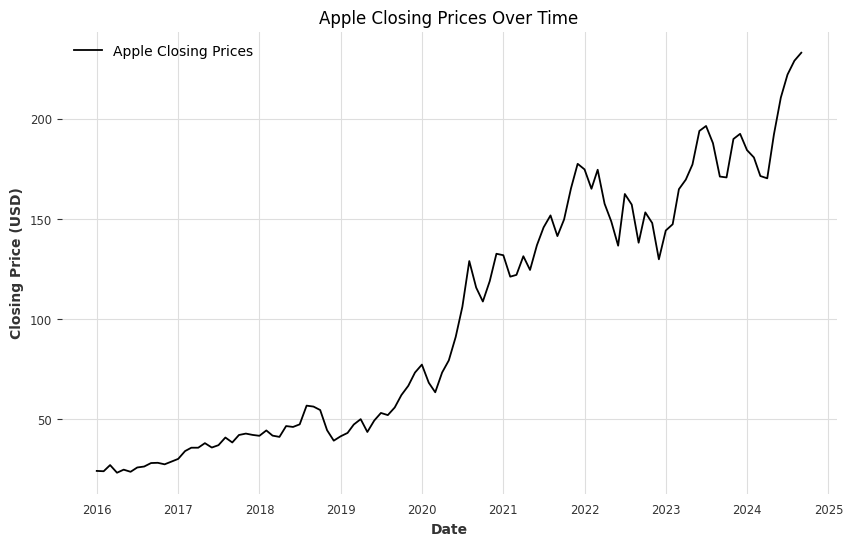

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['AAPL'], label='Apple Closing Prices')
plt.title('Apple Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
apple_train_pd = apple_train.pd_series()
apple_val_pd = apple_val.pd_series()

In [ ]:
mod0=pm.auto_arima(apple_train_pd)

In [ ]:
mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -339.044
Date:                Mon, 28 Oct 2024   AIC                            682.087
Time:                        23:19:44   BIC                            687.195
Sample:                    01-01-2016   HQIC                           684.151
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.7705      0.881      2.009      0.045       0.043       3.498
sigma2        73.6911      9.774      7.540      0.000      54.535      92.847
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.84   Prob(JB):                         0.71
Heteroskedasticity (H):              21.08   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

SARIMAX(p,d,q)

q: parámetro autorregresivo

d: parámetro integrada

q: parámetro media movil

In [ ]:
adf0=adfuller(apple_train_pd, 24)
print(adf0[1])

0.9647296390982775


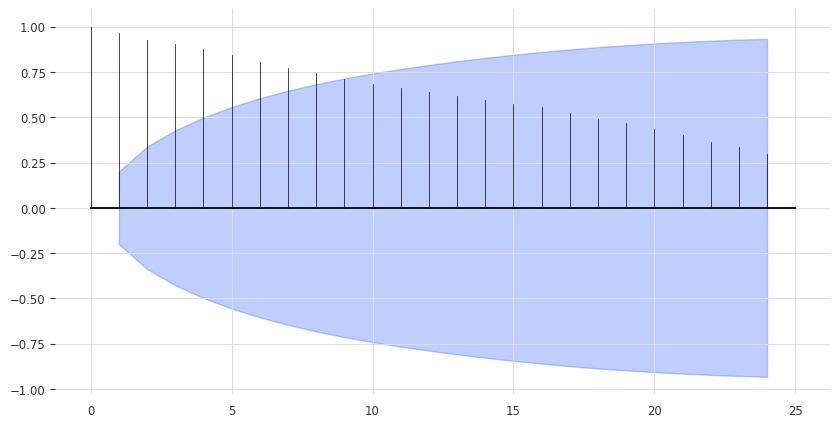

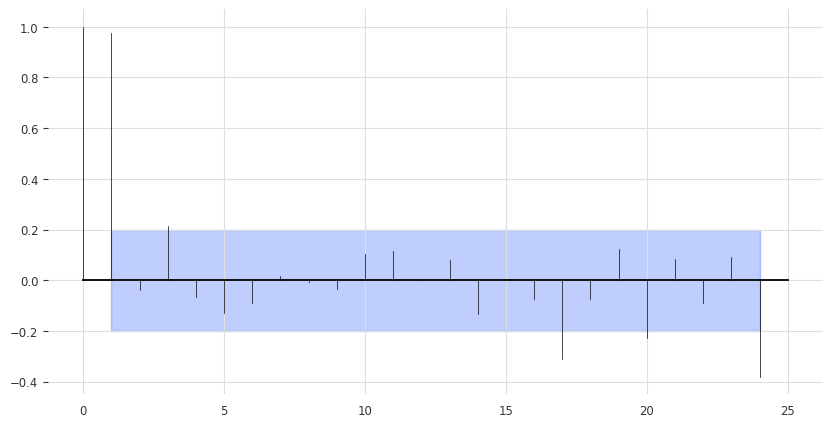

In [ ]:
plot_acf(apple_train)
plot_pacf(apple_train)

In [ ]:
apple_train_diff1 = apple_train.diff()
apple_train_diff1_pd = apple_train_diff1.pd_series()

In [ ]:
adf1=adfuller(apple_train_diff1_pd, 24)
print(adf1[1])

1.1337825509212695e-13


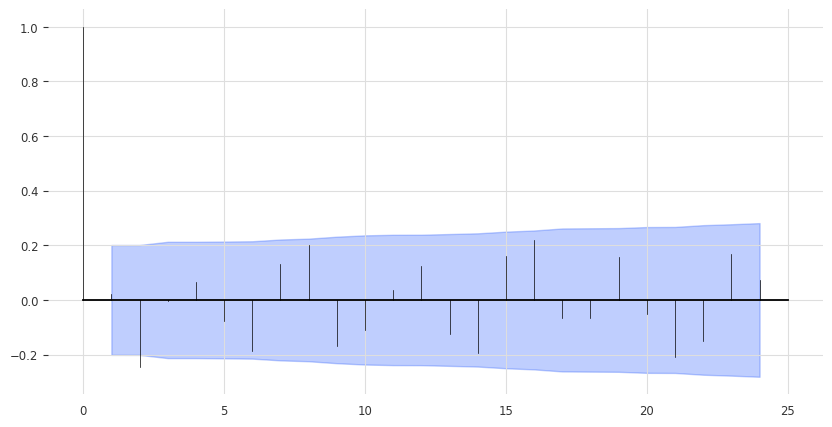

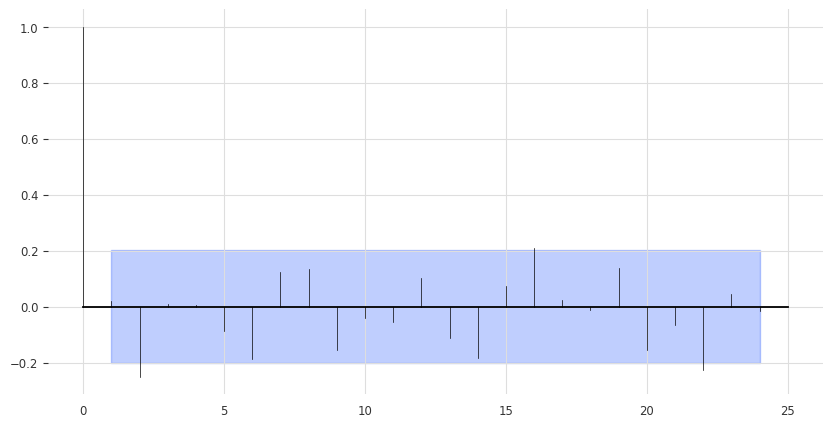

In [ ]:
plot_acf(apple_train_diff1) # me ayuda a seleccionar el parámetro q del ARIMA(p,d,q)
plot_pacf(apple_train_diff1) # me ayuda a seleccionar el parámetro p del ARIMA(p,d,q)

In [ ]:
mod1= SARIMAX(apple_train_pd, order = (2, 1, 2), seasonal_order = (0, 0, 0, 0)).fit(disp=0)

In [ ]:
pred0 = mod0.predict(n_periods=9)
MSE0 = np.square(apple_val_pd-pred0).mean()
rmse0 = np.sqrt(MSE0)

In [ ]:
rmse0

19.488414494592334

In [ ]:
pred1 = mod1.get_forecast(steps=9).predicted_mean
MSE1 = np.square(apple_val_pd-pred1).mean()
rmse1 = np.sqrt(MSE1)

In [ ]:
rmse1

24.759630725010446